# Introduction

The preservation of biodiversity is a crucial aspect of maintaining ecological balance and ensuring the health of our planet. National Parks serve as sanctuaries for species, providing them with habitats free from many human-induced threats. However, even within these protected areas, some species face the risk of extinction. Understanding the conservation status of these species is vital for developing effective conservation strategies.

This project aims to analyze and interpret data from the National Park Service regarding endangered species across various parks. By investigating the conservation statuses of these species and identifying patterns or themes, we hope to uncover insights that can guide future conservation efforts.

# Important disclaimer

The purpose of this project is to practice and demonstrate my recent python and research skills as a data analyst. The project is a visual representation of my thought process. This is not a actual scientific research.



# Sources of data

All data is provided by Codecademy. The data for this project is mostly fictional.


# Key objectives

The key objectives in this project includes:

1: Assess the distribution of species across different conservation status categories (e.g., Endangered, Threatened, Species of Concern).

2: Explore if certain types of species (e.g., mammals, birds, plants) are more prone to becoming endangered.

3: Examine the distribution of species observations across different National Parks and identify parks with high numbers of endangered species.

4: Summarize findings to inform and enhance conservation strategies within the National Parks.

# Introduction to the data

The data is downloaded from the package on Codecademy. Species Information (species_info.csv) contains detailed information about various species found within the National Parks. Species Observations (observations.csv) includes observations of different species recorded across various National Parks.

## Loading the data and exploring the data

Before we perform any analysis, we need to first load the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
observations_df = pd.read_csv('observations.csv')
species_info_df = pd.read_csv('species_info.csv')

After loading the data, we now explore the data.

## Exploring species_info_df

In [2]:
# Display the first few rows for species_info_df
species_info_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


We see that each row represents a different species, and their columns:
- category: The biological classification of the species, which are Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant, and Nonvascular Plant.
- scientific_name: The scientific name of the species.
- common_names: Common names associated with the species.
- conservation_status: The conservation status of the species, indicating its risk of extinction (e.g., Endangered, Threatened, Species of Concern, NAN).

In [3]:
# Display all unique conservation status in species_info_df
species_info_df.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

For the convervation_status column, there are five types of unique conservation status including NA.

In [4]:
# Display all unique category of species in species_info_df
species_info_df.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

There are seven unique categories of species in the category columns.

In [5]:
# Number of rows and columns for species_info_df
species_info_df.shape

(5824, 4)

We see that the observation data set is a data frame with 23296 number of rows and 3 columns. Species data set is a data frame with 5824 number of rows and 4 columns.

In [6]:
# Calculate the number of unique animals and categorize them by their category in species_info_df
species_info_df.scientific_name.nunique(), species_info_df.groupby("category").size()

(5541,
 category
 Amphibian              80
 Bird                  521
 Fish                  127
 Mammal                214
 Nonvascular Plant     333
 Reptile                79
 Vascular Plant       4470
 dtype: int64)

We see that in species data set, there are a total of 5541 unique number of different animals. And among these animals:
- 80 of them are amphian.
- 521 of them are bird.
- 127 of them are fish.
- 214 of them are mammal.
- 333 of them are Nonvascular Plant.
- 79 of them are reptile.
- 4470 of them are vascular Plant.

In [7]:
# Check for number of duplications in the species_info_df
species_info_df['scientific_name'].duplicated().sum()

283

There are 283 duplications in the species data set with the same animal.

In [8]:
species_info_df.conservation_status.isnull().sum()

5633

There are a total of 5633 missing convervation status in the species_info_df. With the duplications and missing convervation status in the species_info_df, this indicate the need for data cleaning for this data before analysis.

## Explore observation_df

In [9]:
# Display the first few rows for observations_df
observations_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


The dataset appears to consist of three columns:

1: scientific_name: The scientific name of the species observed.

2: park_name: The name of the national park where the observation took place.

3: observations: The number of observations recorded.

In [10]:
# The unique parks recorded in the data set
observations_df.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

We can see that there are four unique parks recorded in this data set.

In [11]:
# The number of unique species recorded in the data set
observations_df.scientific_name.nunique()

5541

There are total of 5541 number of unique species in the data set.

In [12]:
# Check the number of rows and columns
observations_df.shape

(23296, 3)

The data set contains 23296 rows and 3 columns.

In [13]:
# Check the data types and for missing values in the data set
observations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


The dataset has the following characteristics:

1: scientific_name: Contains 23296 non-null values and is of type object.

2: park_name: Contains 23296 non-null values and is of type object.

3: observations: Contains 23296 non-null values and is of type int64.

There are no missing values in any of the columns.

In [14]:
# Check for duplicate rows
observations_df.duplicated().sum()

15

There are 15 duplicate rows in the dataset.

Becuase there are duplicates in the data set, we will need to clean the data set

# Cleaning the data
Before we perform any further analysis step, we need to first clean and preprocess the data from any missing values. From our previous section, we see that there is no NAs from the observartion_df.

In [15]:
# Check for missing values in the observation df
missing_values_observations = observations_df.isnull().sum()

# Display the number of missing values
missing_values_observations

scientific_name    0
park_name          0
observations       0
dtype: int64

In [16]:
# Check for missing values in the species_info_df
missing_values_species_info = species_info_df.isnull().sum()

# Display the number of missing values
missing_values_species_info

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

The initial analysis shows that the observations.csv dataset has no missing values, while the species_info.csv dataset has a significant number of missing values in the conservation_status column (5633 missing entries). 

In order to handle missing values in species_info.csv, we will treat missing conservation_status values as a separate category (e.g., "No Status"). And then standardize the Categorical Values.

In [17]:
# Fill missing values in the 'conservation_status' column with 'No Status'
species_info_df['conservation_status'].fillna('No Status', inplace=True)

In [18]:
# Verify that there are no more missing values in the 'conservation_status' column
missing_values_species_info_after_cleaning = species_info_df['conservation_status'].isnull().sum()

missing_values_species_info_after_cleaning

0

We see that all missing values in the conservation_status column have been filled with "No Status".

In [19]:
# Display the values in the 'conservation_status'
unique_conservation_statuses = species_info_df['conservation_status'].unique()

unique_conservation_statuses

array(['No Status', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [20]:
# Display the unique values in the 'category' columns to ensure consistency
unique_categories = species_info_df['category'].unique()

unique_categories

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

The values in conservation_status and category columns are consistent with our expectation after cleaning.

After cleaning the missing value, we will need to remove the duplicates from the data set.

In [21]:
observations_df_cleaned = observations_df.drop_duplicates()
species_info_df_cleaned = species_info_df.drop_duplicates()

In [22]:
# Check for duplicates and NAs in the cleaned datasets
observations_duplicates = observations_df_cleaned.duplicated().sum()
species_info_duplicates = species_info_df_cleaned.duplicated().sum()

observations_nas = observations_df_cleaned.isna().sum()
species_info_nas = species_info_df_cleaned.isna().sum()

observations_duplicates, observations_nas, species_info_duplicates, species_info_nas

(0,
 scientific_name    0
 park_name          0
 observations       0
 dtype: int64,
 0,
 category               0
 scientific_name        0
 common_names           0
 conservation_status    0
 dtype: int64)

We have checked it and both datasets are clean with no duplicates or missing values.

# Assess the distribution of species across different conservation status categories

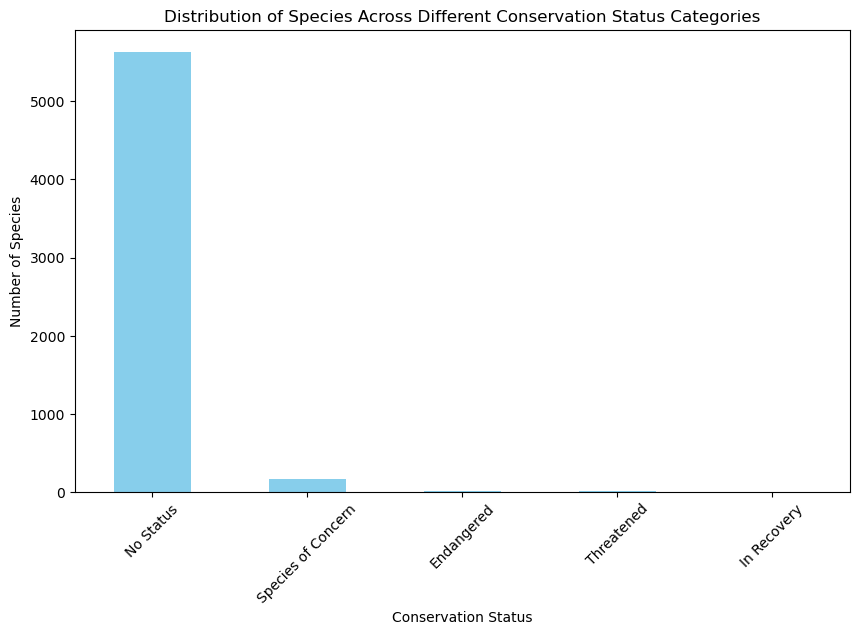

In [23]:
# Assess the distribution of species across different conservation status categories
conservation_status_distribution = species_info_df_cleaned['conservation_status'].value_counts()

# Visualize the distribution
plt.figure(figsize=(10, 6))
conservation_status_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Species Across Different Conservation Status Categories')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.show()

The distribution of species across different conservation status categories in the cleaned dataset is as follows:

- No Status: 5,633 species
- Species of Concern: 161 species
- Endangered: 16 species
- Threatened: 10 species
- In Recovery: 4 species

The majority of species have "No Status," indicating they do not fall into any of the specific conservation categories. ​

# Is certain types of species (e.g., mammals, birds, plants) are more prone to becoming endangered?

<Figure size 1400x800 with 0 Axes>

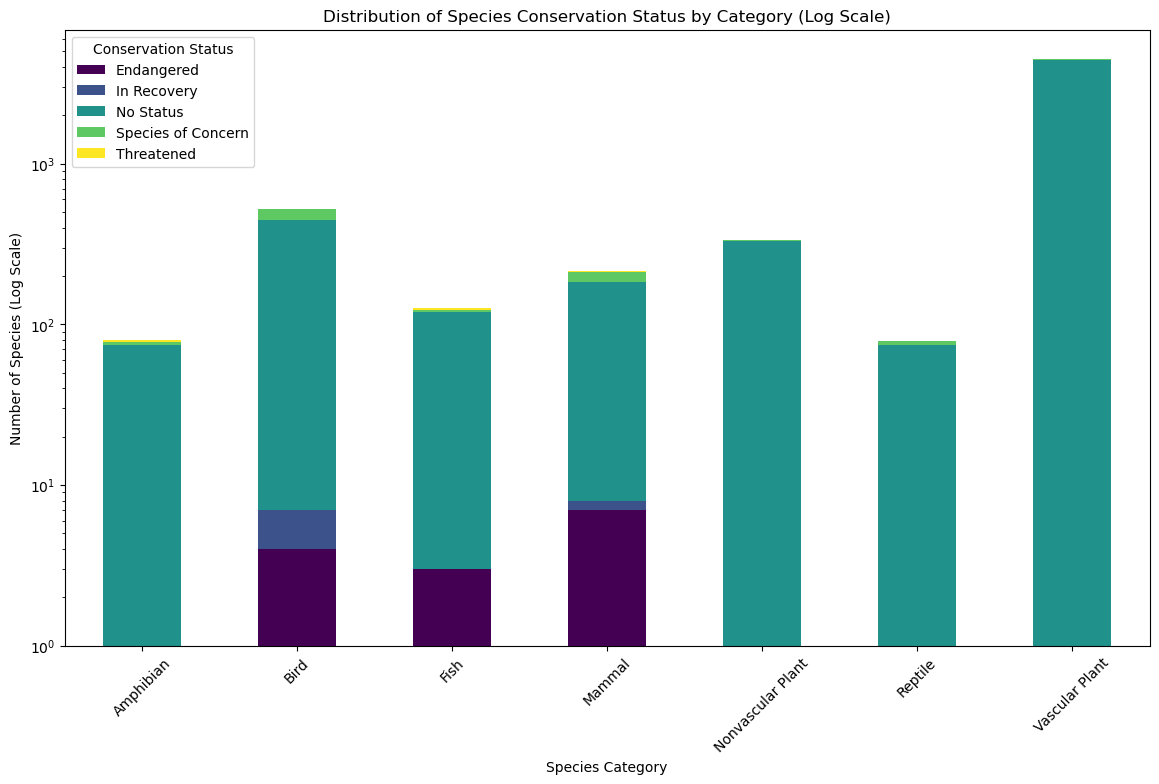

category
Amphibian            1.0
Bird                 4.0
Fish                 3.0
Mammal               7.0
Nonvascular Plant    0.0
Reptile              0.0
Vascular Plant       1.0
Name: Endangered, dtype: float64

In [24]:
# Group by 'category' and 'conservation_status' to explore the relationship
category_conservation_distribution = species_info_df_cleaned.groupby(['category', 'conservation_status']).size().unstack().fillna(0)

# Visualize the distribution
plt.figure(figsize=(14, 8))
category_conservation_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8), logy=True)
plt.title('Distribution of Species Conservation Status by Category (Log Scale)')
plt.xlabel('Species Category')
plt.ylabel('Number of Species (Log Scale)')
plt.xticks(rotation=45)
plt.legend(title='Conservation Status')
plt.show()


# Analyze the 'Endangered' category to see which species types are more prone to becoming endangered
endangered_distribution = category_conservation_distribution['Endangered']

endangered_distribution


The visualization shows the distribution of species across different conservation status categories for each species type (e.g., mammals, birds, plants). 

Mammals and Birds appear to have the highest number of species categorized as "Endangered." Fish also have a notable presence in the "Endangered" category, though to a lesser extent than mammals and birds. Plants (both vascular and nonvascular) have relatively fewer species listed as "Endangered," with nonvascular plants showing no endangered species.

Mammals are the most prone to becoming endangered, followed by birds and fish. This could be due to various factors, including habitat loss, hunting, and environmental changes that disproportionately affect these groups. Plants, particularly nonvascular plants, seem less prone to endangerment, potentially due to different environmental resilience or fewer direct threats from human activities. This analysis could help prioritize conservation efforts towards species categories more at risk.

# Distribution of species observations across different National Parks

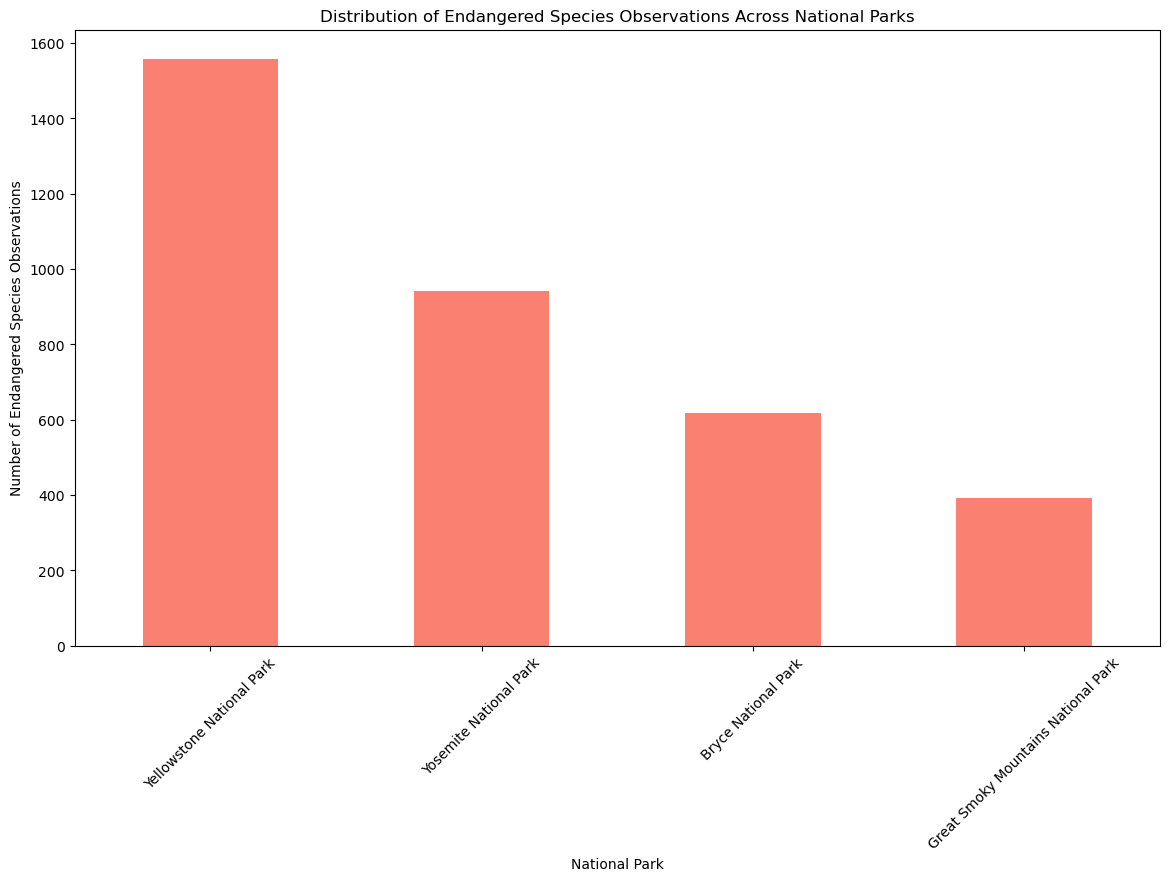

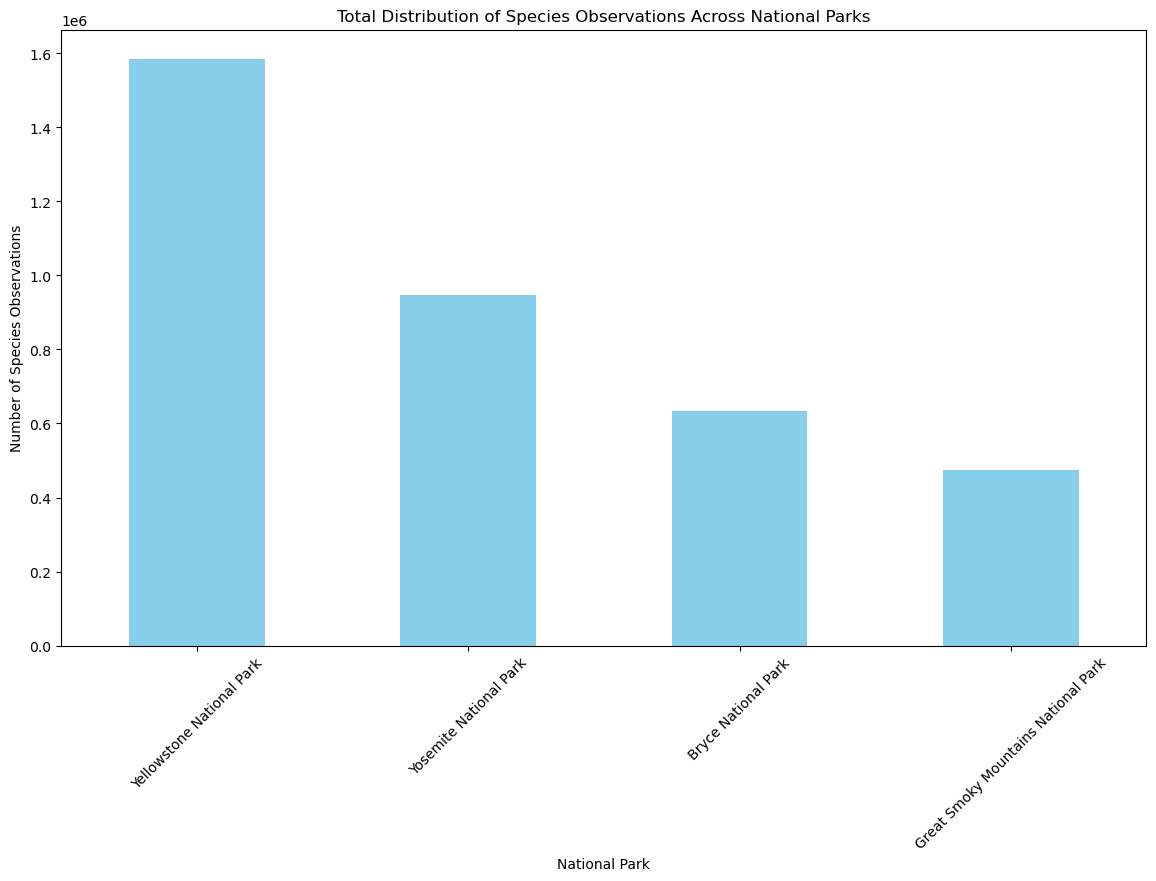

(park_name
 Bryce National Park                     619
 Great Smoky Mountains National Park     393
 Yellowstone National Park              1558
 Yosemite National Park                  943
 Name: observations, dtype: int64,
 park_name
 Bryce National Park                     633043
 Great Smoky Mountains National Park     473979
 Yellowstone National Park              1584890
 Yosemite National Park                  948460
 Name: observations, dtype: int64)

In [25]:
# Merge the observations and species info datasets on 'scientific_name'
merged_df = pd.merge(observations_df_cleaned, species_info_df_cleaned, on='scientific_name')

# Filter for endangered species
endangered_species = merged_df[merged_df['conservation_status'] == 'Endangered']

# Group by 'park_name' to find the number of endangered species observations in each park
endangered_species_distribution = endangered_species.groupby('park_name')['observations'].sum()

# Visualize the distribution
plt.figure(figsize=(14, 8))
endangered_species_distribution.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Distribution of Endangered Species Observations Across National Parks')
plt.xlabel('National Park')
plt.ylabel('Number of Endangered Species Observations')
plt.xticks(rotation=45)
plt.show()

# Analyze the total distribution of species observations across parks
total_species_distribution = merged_df.groupby('park_name')['observations'].sum()

# Visualize the total distribution
plt.figure(figsize=(14, 8))
total_species_distribution.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Distribution of Species Observations Across National Parks')
plt.xlabel('National Park')
plt.ylabel('Number of Species Observations')
plt.xticks(rotation=45)
plt.show()

endangered_species_distribution, total_species_distribution

Yellowstone National Park has the highest number of endangered species observations (1,558), followed by Yosemite National Park (943), Bryce National Park (619), and Great Smoky Mountains National Park (393). Yellowstone National Park also leads in total species observations (1,584,890), followed by Yosemite National Park (948,460), Bryce National Park (633,043), and Great Smoky Mountains National Park (473,979).

Yellowstone National Park stands out as having both the highest total species observations and the highest number of endangered species observations. This suggests that Yellowstone may be a critical area for conservation efforts, particularly for endangered species. Yosemite National Park also has a significant number of endangered species observations, indicating the importance of conservation in this area as well.

# Summary of findings

Mammals, Birds, and Fish are the most vulnerable groups, with mammals showing the highest number of species categorized as "Endangered." Plants, particularly nonvascular plants, are less prone to endangerment, possibly due to their environmental resilience or fewer direct threats.

Yellowstone National Park has the highest number of endangered species observations, making it a critical area for conservation efforts. Yosemite National Park also shows a significant number of endangered species, followed by Bryce National Park and Great Smoky Mountains National Park. The high number of endangered species in these parks suggests that these areas are key habitats for vulnerable species and need prioritized protection measures. Yellowstone, Yosemite, and Bryce National Parks not only host a large number of species but also have substantial numbers of endangered species. This underscores the ecological importance of these parks.



# Recommendations for conservation strategies

We should prioritize mammals and birds in conservation efforts. Given their high vulnerability, conservation strategies should focus on protecting habitats, reducing human-wildlife conflict, and addressing specific threats like poaching and habitat destruction for these species groups.

Secondly, we should focused conservation in Yellowstone and Yosemite. Allocate more resources, such as funding and manpower, to Yellowstone and Yosemite National Parks. These parks should be prioritized for research, monitoring, and implementation of conservation programs aimed at endangered species. Strengthen protective measures and habitat restoration efforts in these parks, as they are home to a significant portion of endangered species.

Thirdly, we should enhance monitoring and data collection. Increase the frequency and scope of species monitoring programs in the parks to ensure up-to-date data on species populations, particularly endangered ones. Use this data to adapt conservation strategies dynamically, ensuring that efforts remain relevant and effective.